In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_1 = loadmat("project8data1.mat")

In [3]:
data_1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [4]:
data_1["X"].shape

(50, 2)

In [5]:
X = data_1["X"]

m = X.shape[0]

In [6]:
X

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929],
       [4.57407171, 5.39765069],
       [4.37173356, 5.46116549],
       [4.19169388, 4.95469359],
       [5.24408518, 4.66148767],
       [2.8358402 , 3.76801716],
       [5.63526969, 6.31211438],
       [4.68632968, 5.6652411 ],
       [2.85051337, 4.62645627],
       [5.1101573 , 7.36319662],
       [5.18256377, 4.64650909],
       [5.70732809, 6.68103995],
       [3.57968458, 4.80278074],
       [5.63937773, 6.12043594],
       [4.26346851, 4.68942896],
       [2.53651693, 3.88449078],
       [3.22382902, 4.94255585],
       [4.92948801, 5.95501971],
       [5.79295774, 5.10839305],
       [2.81684824, 4.81895769],
       [3.88882414, 5.10036564],
       [3.

In [7]:
m

50

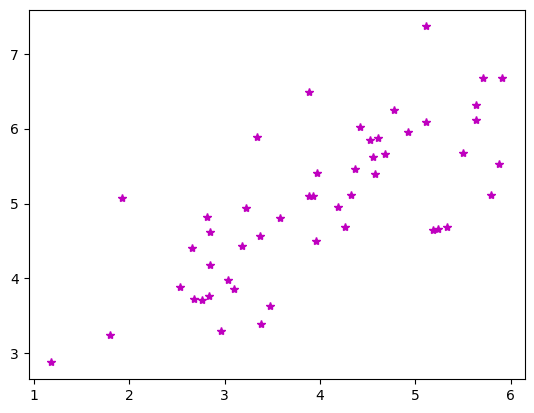

In [8]:
plt.plot(X[:, 0], X[:, 1], "m*")

In [9]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [10]:
def find_Closest_Centroid(X, centroids): 
  m = X.shape[0]
  K = centroids.shape[0]
  idx = np.zeros(m, dtype= int)
  for i in range(m): 
    distance_array = np.sqrt(np.sum(np.square(X[i] - centroids), axis= 1))
    idx[i] = np.argmin(distance_array)
  return idx

In [11]:
idx = find_Closest_Centroid(X, initial_centroids)
print(idx)

[0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 2 0 0 2 0 2 0 2 0 0 0 2 2 0 0 0 2 0 2 0 2 0
 2 0 0 0 0 0 0 0 0 0 0 0 2]


In [12]:
def compute_Centroids(X, idx, K):
  m, n = X.shape
  centroids = np.zeros((K, n))

  for k in range(K):
    centroids[k] = np.mean(X[idx == k], axis= 0)
    #centroid[0] = np.mean(X[idx == 0], axis= 0)
  return centroids

In [13]:
X.shape

(50, 2)

In [14]:
centroids = compute_Centroids(X, idx, K= 3)

In [15]:
print(centroids)

[[3.48343653 4.67666952]
 [5.24408518 4.66148767]
 [5.44433562 6.03683605]]


In [16]:
initial_centroids

array([[3, 3],
       [6, 2],
       [8, 5]])

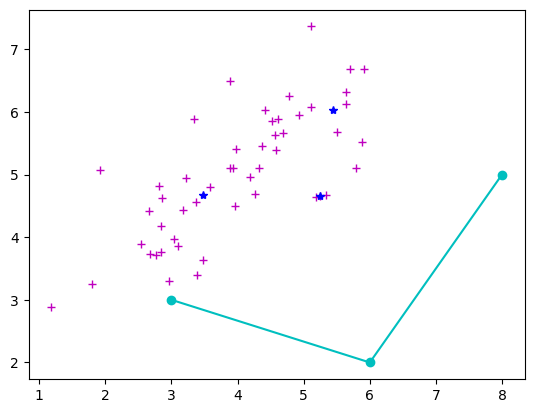

In [17]:
plt.plot(X[:, 0], X[:, 1], "m+")
plt.plot(centroids[:, 0], centroids[:, 1], "b*")
plt.plot(initial_centroids[:, 0], initial_centroids[:, 1], "c-o")

In [18]:
def K_means(X, centroids_, K, max_iter, find_Closest_Centroid, compute_Centroids):
  plt.figure()
  plt.plot(X[:,0], X[:,1], "b*")
    
  for i in range(max_iter):
    idx = find_Closest_Centroid(X, centroids_)
    centroids_ = compute_Centroids(X, idx, K)
    plt.figure()
    plt.plot(centroids_[:, 0], centroids_[:,1], "yo")

    cluster0_idx = (idx == 0)
    cluster1_idx = (idx == 1)
    cluster2_idx = (idx == 2)

    plt.plot(X[cluster0_idx, 0], X[cluster0_idx, 1], "bo")
    plt.plot(X[cluster1_idx, 0], X[cluster1_idx, 1], "m+")
    plt.plot(X[cluster2_idx, 0], X[cluster2_idx, 1], "g*")
    plt.title(str(i))

  return idx, centroids_

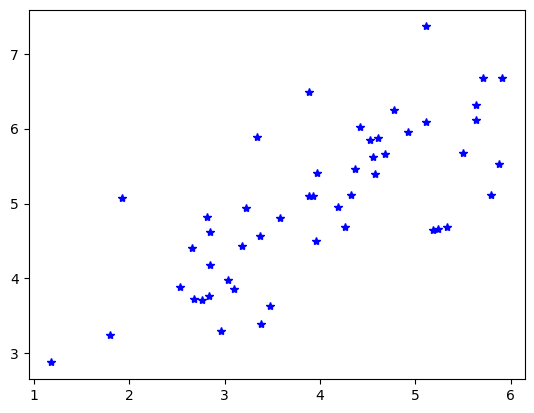

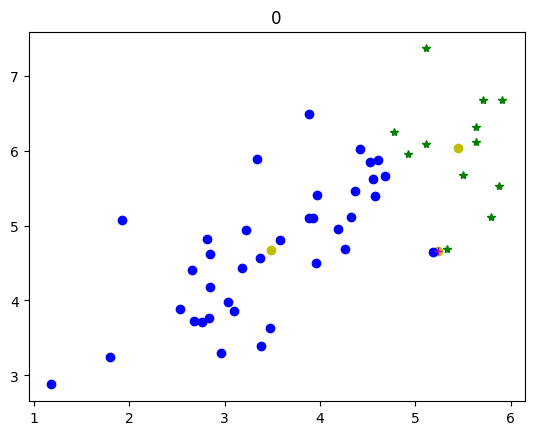

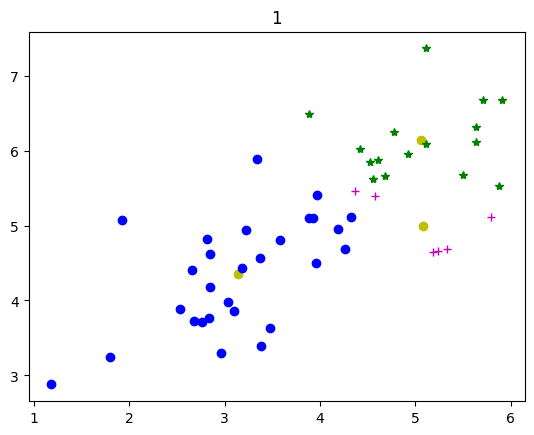

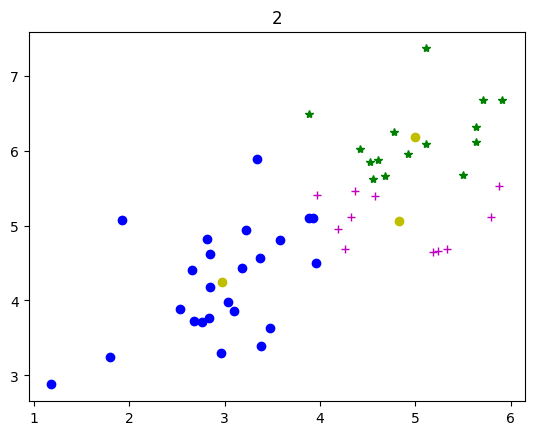

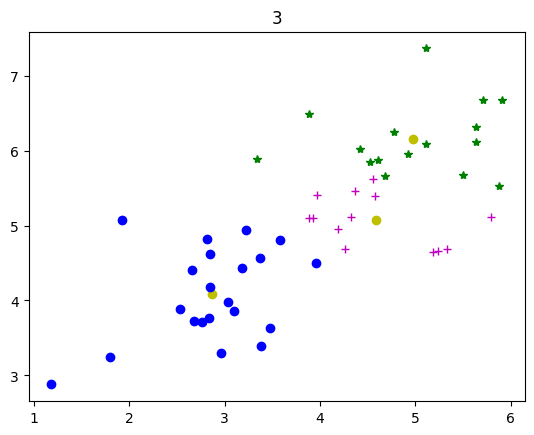

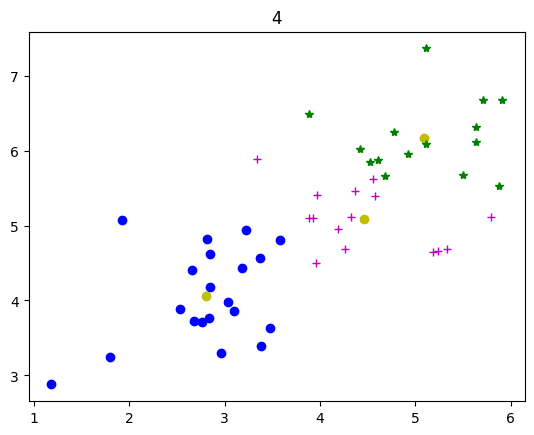

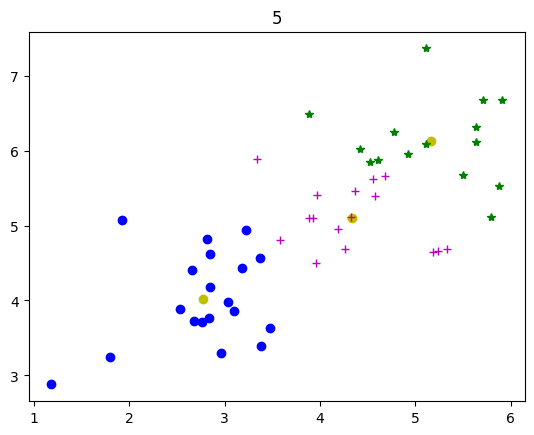

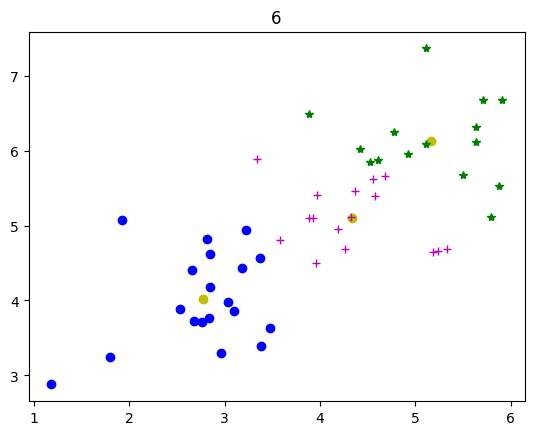

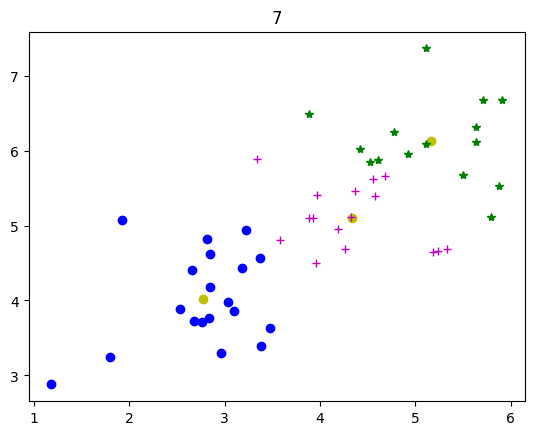

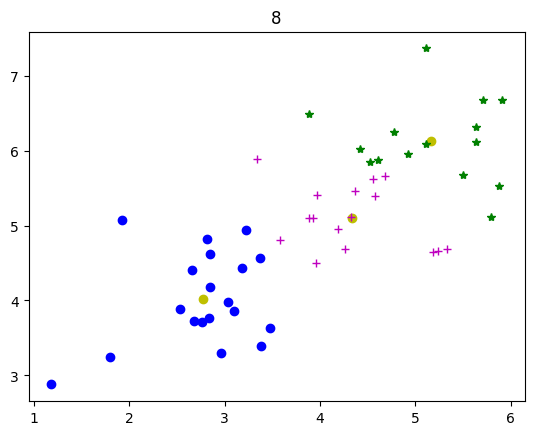

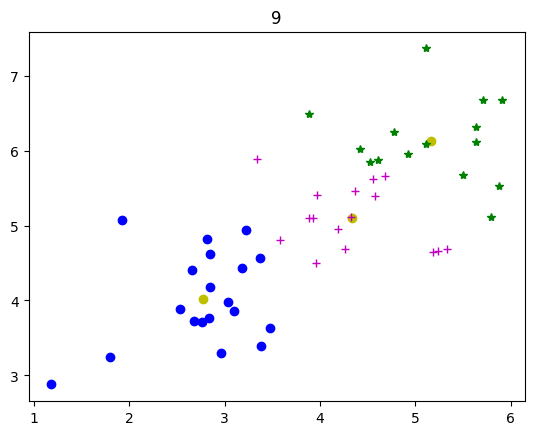

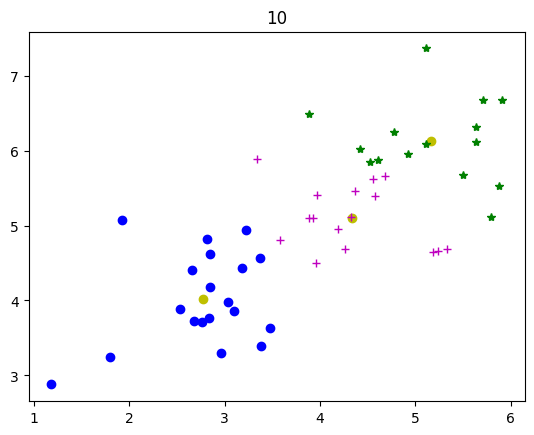

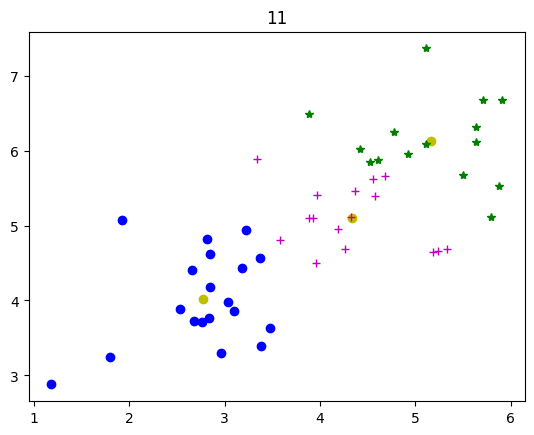

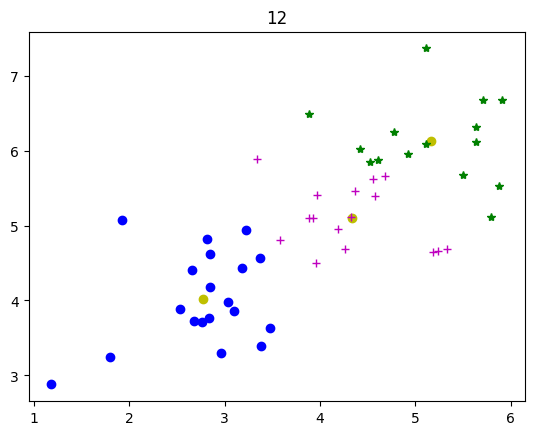

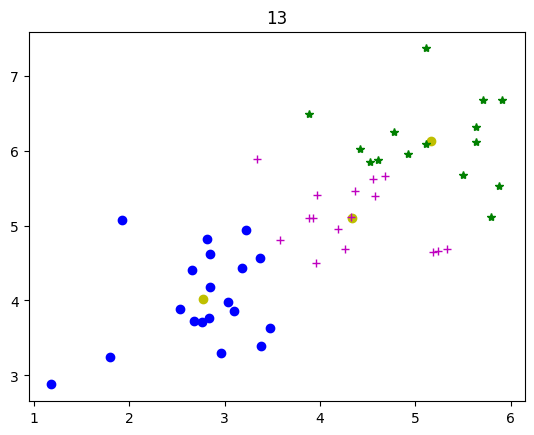

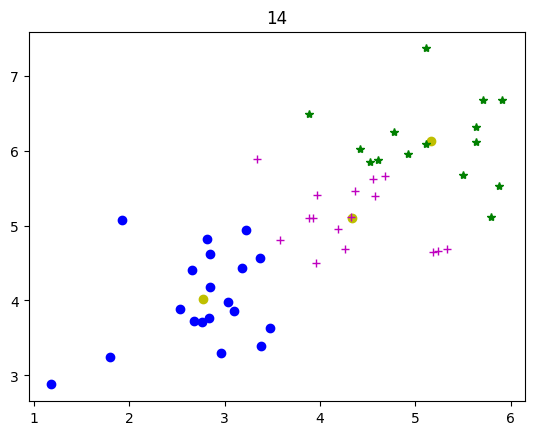

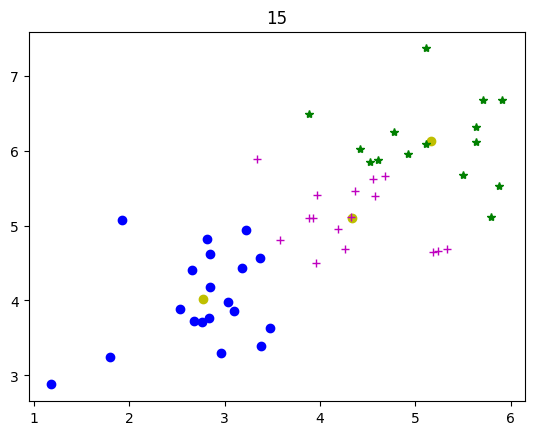

In [19]:
max_iter = 16
K = 3 
centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx, centroids = K_means(X, centroids, K, max_iter, find_Closest_Centroid, compute_Centroids)

In [20]:
print(centroids)

[[2.7692839  4.02273777]
 [4.33734052 5.10618711]
 [5.16329478 6.13395206]]


In [21]:
def random_Centroids(X, K):
  m, n = X.shape
  centroids = np.zeros((K, n))
  rand_idx = np.random.permutation(m)
  print(rand_idx)
  centroids = X[rand_idx[0: K], :]
  print(centroids)
  return centroids

In [22]:
randcentroid = random_Centroids(X, K= 3)
randcentroid

[34 25 11 30 48 14 38 49 35 27 32 28 41 21 39  1  0 43 36 12 23 26 19 42
  2 46  5 40  3 24 13 16  7  4 33 29 31  8 22  9 10  6 18 15 37 47 17 45
 44 20]
[[3.37542687 4.56537852]
 [3.22382902 4.94255585]
 [4.37173356 5.46116549]]


array([[3.37542687, 4.56537852],
       [3.22382902, 4.94255585],
       [4.37173356, 5.46116549]])